# Matemática para Ciencia de los Datos
# Trabajo Práctico 5

Profesor: Luis Alexánder Calvo Valverde 

Instituto Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Fecha de entrega: Lunes 29 de Mayo del 2023, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ). 

Estudiante:
1. **Ricardo Chacon Brenes**


---

**Pregunta 1 (30 puntos)**

Para la siguiente función:


$f_{2}\left(x_{1},x_{2}\right)=x_{1}e^{\left(-x_{1}^{2}-x_{2}^{2}\right)}$



Realice lo siguiente:

En python, genere un gráfico, puede usar la función meshgrid (Use la biblioteca plotly). 








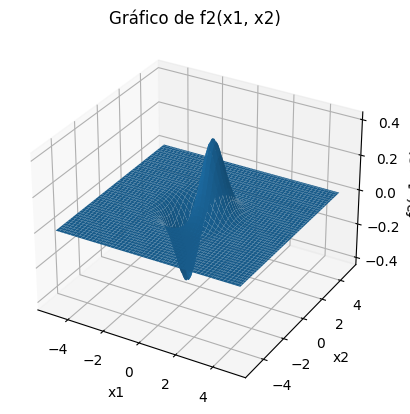

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Crear los puntos en el rango deseado
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calcular los valores de la función en cada punto
Z = X1 * np.exp(-(X1**2 + X2**2))

# Grafico
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z)

# Personalizar  gráfico
ax.set_title('Gráfico de f2(x1, x2)')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f2(x1, x2)')

# Guardar el gráfico en un archivo PDF
plt.savefig('grafico.pdf')

# Mostrar Grafico
plt.show()



---

**Pregunta 2 (20 puntos)**

Para la siguiente función multivariable: $z=f\left(x,y\right)=3x^{2}+2y^{4}$, calcule el vector gradiente manualmente.  Evalúelo para el punto $P_{1}=\left(7.4,-6.3\right)$. Luego calcule la magnitud (norma Euclidiana) del vector gradiente para el punto. Finalmente normalice el vector resultante. 

--No se require programación en python--.

SOLUCION


$z = f(x, y) = 3x^2 + 2y^4$

$\frac{\partial f}{\partial x} = 6x$

$\frac{\partial f}{\partial y} = 8y^3$

$\nabla f(x, y) = \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right) = (6x, 8y^3)$

Evaluar el vector graciente en el punto $P_1 = (7.4, -6.3)$

$\nabla f(7.4, -6.3) = (6(7.4), 8(-6.3)^3) = (44.4, -1900.56)$

Norma Euclidiana

$||\nabla f(7.4, -6.3)|| = \sqrt{44.4^2 + (-1900.56)^2} = \sqrt{1971.36 + 3612153.5056} = \sqrt{3614124.8656} \approx 1901.05$

$\hat{\nabla f}(7.4, -6.3) = \left(\frac{44.4}{1901.05}, \frac{-1900.56}{1901.05}\right)$

RESPUESTA

VECTOR GRADIENTE normalizado en el punto $P_1 = (7.4, -6.3)$

$\left(0.0234, -0.9987\right)$.





---
**Pregunta 3 (20 puntos)**

Calcule el vector gradiente $\nabla f$ para la siguiente función multi-variable $f: \mathbb{R}^2\rightarrow\mathbb{R}$. 

$f(x,y) = x^3+y^2$  

    * Además, evalúe en 
$\begin{bmatrix}1\\1\end{bmatrix}$.


RESPUESTA

Aplicamos derivadas parciales para la funcion $z$.

$\begin{bmatrix} 3x^2 \\ 2y \end{bmatrix}$

Evaluamos: 

$\begin{bmatrix} 3(1)^2 \\ 2(1) \end{bmatrix}$

Obtenemos como resultado el vector

$\begin{bmatrix} 3 \\ 2 \end{bmatrix}$






---

**Pregunta 4 (30 puntos)**

La ténica del SVD puede ser utiliada para la compresión de imágenes. Por ejemplo, una imagen **[1]** de $m×n$ pixels en escala de grises puede ser representada como una matriz $A \in R^{m×n}$ cuyos elementos $a_{ij}$ representan la intensidad del pixel $(i, j)$. En particular, una imagen contiene mucha información redundante, es decir, que puede ser eliminada sin que el efecto visual sea notable. 

Se podría sustituir la matriz $A$ por otra matriz $B$ de rango menor. 

Consideremos:

Teorema: Sean $\sigma_{1} \geq \sigma_{2} \geq \cdots \geq \sigma_{r} > 0 $, valores singulares no  nulos de $A \in C^{m×n}$. Entonces para cada $k < r$, la distancia desde $A$ al conjunto de matrices de rango $k$ en la norma $\left\Vert \cdot \right\Vert _{2} $ es:

$$\sigma_{k+1} = \min\limits_{rank(B)=k} \left\Vert A - B \right\Vert _{2}$$

Por tanto, si $A = UDV^T $ es la descomposición en valores singulares de $A$, la matriz de rango $k$ de mejor aproximación a $A$ es:

$$B = U 
\begin{bmatrix} D  &  0      \\
                0  &  0
\end{bmatrix} V^T , D = diag(\sigma_1, \sigma_2, \cdots , \sigma_k)$$

Si $U_k$ y $V_k$ son las matrices compuestas por las primeras $k$ columnas de $U$ y $V$,  respectivamente, entonces se puede decir que (fórmula **f_1**):

$$B = U_k D V_{k}^{T}$$

logrando codificar la imagen aproximada por medio de matrices de menor tamaño.

Por otra parte, las imágenes en color **[2]** se representan en Python como matrices numéricas tridimensionales, la tercera dimensión para representar los valores de color (rojo, verde azul). Sin embargo, el método SVD es aplicable a matrices bidimensionales. Así que tenemos que encontrar una manera de convertir la matriz tridimensional en matrices bidimensionales, aplicar SVD y reconstruirla como una matriz  tridimensional. Hay dos maneras de hacerlo. Mostraremos ambos métodos a continuación.
1. método de remodelación: Este método implica aplanar la tercera dimensión de la matriz de imágenes en la segunda dimensión utilizando el método de reshape.
1. Método de capa:   Este método trata una imagen en color como una pila de 3 imágenes bidimensionales separadas (capas roja, azul y verde). Se aplica la reconstrucción SVD truncada en cada capa bidimensional por separado y luego se vuelven a juntar las capas reconstruidas.

Investigue uno de estos métodos y aplique un procedimiento similar al del cuaderno visto en clase, utilizando la figura adjunta "Imagen1.jpg" (**procesando la imagen a color, NO en escala de grises**).


1. Cargue la imagen adjunta, "Perrita.jpg". 
1. Muestre su contenido en pantalla.
1. Calcule la descomposicíón en valores singulares.
1. Sea $k$ los primeros $k_{ésimos}$ primeros valores singulares. Para $k \in [5, 10, 50, 100, 2000, 3000]$, haga:
    1. Trunque las matrices U, D y V dejando sólo aquellas columnas que corresponden a los valores singulares seleccionados ($k$), obteniendo las matrices $U_k$, $D$ y $V_k$. 
    1. Muestre el tamaño de cada una de las matrices. 
    1. Calcule la matriz $B$ que aproxima a $A$ segúnn la fórmula **f_1** (ver arriba).
    1. Muestre la imagen correspondiente al contenido de la matriz $B$.
    
**[1]** Texto base: https://w3.ual.es/~andrei/Practicas/practica14.pdf

**[2]** Texto base de Ramesh Putalapattu.

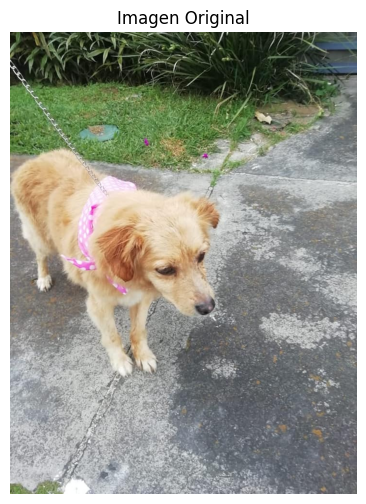

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


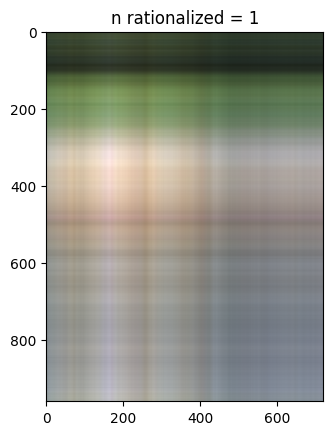

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


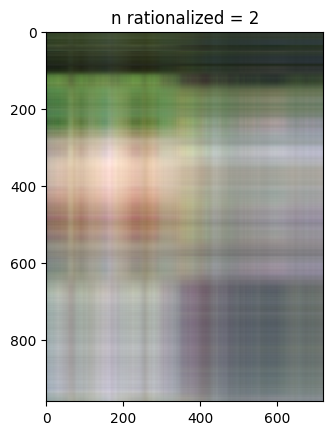

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


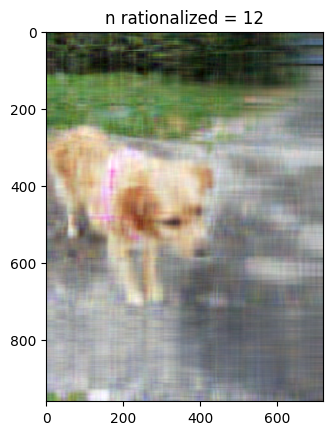

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


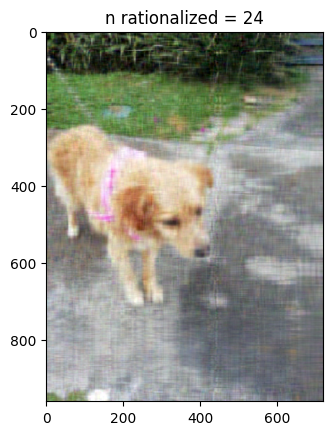

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


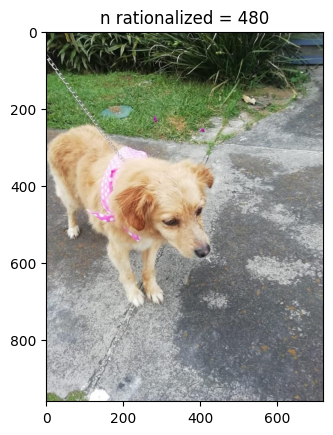

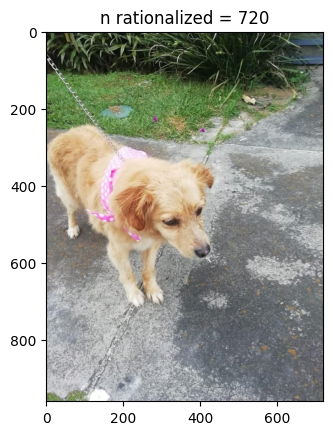

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Cargar la imagen
image_path = 'C:/Users/chaconri/Desktop/Data Science TEC/Perrita.jpg'
image = Image.open(image_path)

# Mostrar la imagen original
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title('Imagen Original')
plt.show()

np.shape(image)

image = plt.imread("perrita.jpg")

img_r = image[:, :, 0]
img_g = image[:, :, 1]
img_b = image[:, :, 2]

U_r, D_r, V_r = np.linalg.svd(img_r)
U_g, D_g, V_g = np.linalg.svd(img_g)
U_b, D_b, V_b = np.linalg.svd(img_b)

# Racionalizar los componentes
def rationalize(domain):
    if domain[-1] > np.shape(image)[2]:
        new_domain = []
        ratio = np.shape(image)[1] / domain[-1]
        
        for i in domain:
            new_domain.append(int(i * ratio))
        return new_domain
    else:
        domain


for i in rationalize([5, 10, 50, 100, 2000, 3000]):
    reconstimg_r = np.matmul( np.matmul( np.matrix(U_r[:, :i]) , np.diag(D_r[:i]) ) , np.matrix(V_r[:i, :]) )
    reconstimg_r = np.array(reconstimg_r.astype(int))
    
    reconstimg_g = np.matmul( np.matmul( np.matrix(U_g[:, :i]) , np.diag(D_g[:i]) ) , np.matrix(V_g[:i, :]) )
    reconstimg_g = np.array(reconstimg_g.astype(int))
    
    reconstimg_b = np.matmul( np.matmul( np.matrix(U_b[:, :i]) , np.diag(D_b[:i]) ) , np.matrix(V_b[:i, :]) )
    reconstimg_b = np.array(reconstimg_b.astype(int))
    
 
    reconstimg = np.stack((reconstimg_r, reconstimg_g, reconstimg_b), axis=2)
    
    plt.imshow(reconstimg)
    title = "n rationalized = %s" % i
    plt.title(title)
    plt.show()


